<a href="https://colab.research.google.com/github/anmolsabharwal/RedDevils/blob/master/RD_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
from google.colab import drive
import datetime
import plotly.figure_factory as ff


drive.mount('/content/drive')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
gws = sqlite3.connect('/content/drive/My Drive/fpl.db')
gws = pd.read_sql_query("SELECT * FROM gw",gws)
#gws1=pd.read_csv(io.StringIO(uploaded['gws.csv'].decode('utf-8')),sep=',')
gws.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
0,Aaron_Cresswell,0,0,0,0,0,454,10,0,0,0,0,2016-08-15T19:00:00Z,0,4,0,0,0,0,1,0,14023,1,2,0,0,0,0,0,55,FALSE,0
1,Aaron_Lennon,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,0,0,0,0,1,0,13918,1,1,0,1,0,0,0,60,TRUE,0
2,Aaron_Ramsey,0,0,5,0,4.9,16,8,3,0,3,2.2,2016-08-14T15:00:00Z,60,9,0,0,0,0,1,0,163170,4,3,23,2,0,0,0,80,TRUE,0
3,Abdoulaye_Doucour�,0,0,0,0,0,482,7,0,0,0,0,2016-08-13T14:00:00Z,0,13,0,0,0,0,1,0,1051,1,1,0,0,0,0,0,50,FALSE,0
4,Abdul Rahman_Baba,0,0,0,0,0,80,10,0,0,0,0,2016-08-15T19:00:00Z,0,20,0,0,0,0,1,0,1243,1,2,0,0,0,0,0,55,TRUE,0


In [3]:
gws.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards'],
      dtype='object')

In [4]:
gws=gws.astype({'name':'category','assists':int, 'bonus':int, 'bps':int, 'clean_sheets':'category',
       'creativity':float,'element':int,'goals_conceded':int,
       'goals_scored':int, 'ict_index':float, 'influence':float,'minutes':int, 'opponent_team':int, 'own_goals':int,'penalties_missed':int, 'penalties_saved':int,
       'red_cards':int, 'round':int, 'saves':int, 'selected':int,
        'team_a_score':int, 'team_h_score':int,'threat':float,
       'total_points':int, 'transfers_balance':int, 'transfers_in':int, 'transfers_out':int,
       'value':int, 'yellow_cards':int})

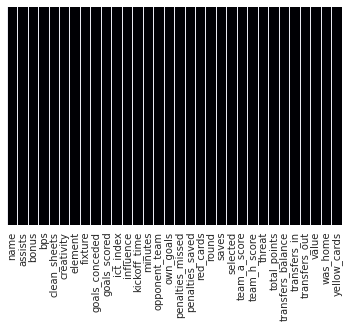

In [5]:
sns.set_style('dark')
sns.heatmap(gws.isnull(),yticklabels=False,cbar=False,cmap='inferno')

In [6]:
gws = gws.assign(id=(gws['name']).astype('category').cat.codes)


In [7]:
def fd(x):
  x=int(x)
  if x<=6:
    return '3'
  elif x>6 and x<=14:
    return '1'
  else:
    return '2'

In [8]:
gws.rename(columns={'opponent_team':'fdr'},inplace=True)


In [9]:
gws['fdr']=gws['fdr'].apply(fd).astype(float)


In [10]:
gws['kickoff_time']=pd.to_datetime(gws['kickoff_time'])

In [11]:
gws['kickoff_time'] = gws.kickoff_time.dt.hour


In [12]:
def time(x):
  x=int(x)
  if x>8 and x<=12:
    return '0'
  elif x>12 and x<=18:
    return '1'
  else:
    return '2'

In [13]:
gws['kickoff_time']=gws['kickoff_time'].apply(time).astype(float)
gws.head(20)

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,id
0,Aaron_Cresswell,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,1,0,14023,1,2,0.0,0,0,0,0,55,FALSE,0,1
1,Aaron_Lennon,0,0,6,0,0.3,142,3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,1,0,13918,1,1,0.0,1,0,0,0,60,TRUE,0,4
2,Aaron_Ramsey,0,0,5,0,4.9,16,8,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,1,0,163170,4,3,23.0,2,0,0,0,80,TRUE,0,12
3,Abdoulaye_Doucour�,0,0,0,0,0.0,482,7,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,1,0,1051,1,1,0.0,0,0,0,0,50,FALSE,0,23
4,Abdul Rahman_Baba,0,0,0,0,0.0,80,10,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,1,0,1243,1,2,0.0,0,0,0,0,55,TRUE,0,25
5,Abel_Hern�ndez,1,0,10,0,12.2,163,4,1,0,5.7,14.4,0.0,90,1.0,0,0,0,0,1,0,26039,1,2,30.0,5,0,0,0,60,TRUE,0,26
6,Adama_Diomande,0,2,29,0,16.8,164,4,1,1,10.7,45.2,0.0,90,1.0,0,0,0,0,1,0,38151,1,2,45.0,8,0,0,0,45,TRUE,0,46
7,Adam_Clayton,0,0,6,0,2.2,283,6,1,0,1.4,3.2,1.0,90,1.0,0,0,0,0,1,0,17663,1,1,9.0,2,0,0,0,45,TRUE,0,29
8,Adam_Federici,0,0,0,0,0.0,30,9,0,0,0.0,0.0,0.0,0,1.0,0,0,0,0,1,0,4315,3,1,0.0,0,0,0,0,45,TRUE,0,30
9,Adam_Forshaw,0,0,3,0,1.3,286,6,1,0,0.3,2.0,1.0,69,1.0,0,0,0,0,1,0,2723,1,1,0.0,1,0,0,0,45,TRUE,1,31


In [14]:
def was_home(x):
  if x=="FALSE":
    #print('Away')
    return str('Away')
  else:
    #print('Home')
    return str('Home')

In [15]:
gws['home']=gws['was_home'].apply(was_home)

In [16]:
gws.drop(['element','fixture','round','transfers_balance','transfers_in','transfers_out','team_a_score','was_home',	'team_h_score','round'],axis=1, inplace=True)

In [17]:
gws.head(50)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home
0,Aaron_Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,0,14023,0.0,0,55,0,1,Away
1,Aaron_Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,0,13918,0.0,1,60,0,4,Home
2,Aaron_Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,0,163170,23.0,2,80,0,12,Home
3,Abdoulaye_Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,1051,0.0,0,50,0,23,Away
4,Abdul Rahman_Baba,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,0,1243,0.0,0,55,0,25,Home
5,Abel_Hern�ndez,1,0,10,0,12.2,1,0,5.7,14.4,0.0,90,1.0,0,0,0,0,0,26039,30.0,5,60,0,26,Home
6,Adama_Diomande,0,2,29,0,16.8,1,1,10.7,45.2,0.0,90,1.0,0,0,0,0,0,38151,45.0,8,45,0,46,Home
7,Adam_Clayton,0,0,6,0,2.2,1,0,1.4,3.2,1.0,90,1.0,0,0,0,0,0,17663,9.0,2,45,0,29,Home
8,Adam_Federici,0,0,0,0,0.0,0,0,0.0,0.0,0.0,0,1.0,0,0,0,0,0,4315,0.0,0,45,0,30,Home
9,Adam_Forshaw,0,0,3,0,1.3,1,0,0.3,2.0,1.0,69,1.0,0,0,0,0,0,2723,0.0,1,45,1,31,Home


In [18]:
gws['value']=gws['value']*0.1
gws1=gws.copy()


In [19]:
gws1['Last_Week_Points'] = gws1.groupby(['id'])['total_points'].shift().astype(float)
gws1['Last_2_Week_Points'] = gws1.groupby(['id'])['total_points'].shift(2).astype(float)
#gws1['Last_3_Week_Points'] = gws1.groupby(['id'])['total_points'].shift(3).astype(float)
#gws1['Last_4_Week_Points'] = gws1.groupby(['id'])['total_points'].shift(4).astype(float)



gws1['Last_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift().astype(float)
gws1['Last_2_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(2).astype(float)
#gws1['Last_3_Week_Goals'] = gws1.groupby(['id'])['goals_scored'].shift(3).astype(float)


gws1['Last_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift().astype(float)
gws1['Last_2_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(2).astype(float)
#gws1['Last_3_Week_ICT'] = gws1.groupby(['id'])['ict_index'].shift(3).astype(float)


gws1['Last_Week_BPS'] = gws1.groupby(['id'])['bps'].shift().astype(float)
gws1['Last_2_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(2).astype(float)
#gws1['Last_3_Week_BPS'] = gws1.groupby(['id'])['bps'].shift(3).astype(float)


gws1['Last_Week_Assists'] = gws1.groupby(['id'])['assists'].shift().astype(float)
gws1['Last_2_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(2).astype(float)
#gws1['Last_3_Week_Assists'] = gws1.groupby(['id'])['assists'].shift(3).astype(float)


gws1['Last_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift().astype(float)
gws1['Last_2_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(2).astype(float)
#gws1['Last_3_Week_Bonus'] = gws1.groupby(['id'])['bonus'].shift(3).astype(float)


gws1['Last_Week_Influence'] = gws1.groupby(['id'])['influence'].shift().astype(float)
gws1['Last_2_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(2).astype(float)
#gws1['Last_3_Week_Influence'] = gws1.groupby(['id'])['influence'].shift(3).astype(float)


gws1['Last_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift().astype(float)
gws1['Last_2_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(2).astype(float)
#gws1['Last_3_Week_Minutes_Played'] = gws1.groupby(['id'])['minutes'].shift(3).astype(float)


gws1['Last_Week_Threat'] = gws1.groupby(['id'])['threat'].shift().astype(float)
gws1['Last_2_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(2).astype(float)
#gws1['Last_3_Week_Threat'] = gws1.groupby(['id'])['threat'].shift(3).astype(float)


gws1['Last_Week_Selected'] = gws1.groupby(['id'])['selected'].shift().astype(float)
gws1['Last_2_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(2).astype(float)
#gws1['Last_3_Week_Selected'] = gws1.groupby(['id'])['selected'].shift(3).astype(float)


gws1['Last_Week_Value'] = gws1.groupby(['id'])['value'].shift().astype(float)
gws1['Last_2_Week_Value'] = gws1.groupby(['id'])['value'].shift(2).astype(float)
# gws1['Last_3_Week_Value'] = gws1.groupby(['id'])['value'].shift(3).astype(float)


gws1['Last_Week_Creativity'] = gws1.groupby(['id'])['creativity'].shift().astype(float)
gws1['Last_2_Week_Creativity'] = gws1.groupby(['id'])['creativity'].shift(2).astype(float)
#gws1['Last_3_Week_Creativity'] = gws1.groupby(['id'])['creativity'].shift(3).astype(float)



gws1['Last_Week_FDR'] = gws1.groupby(['id'])['fdr'].shift().astype(float).astype(float)
gws1['Last_2_Week_FDR'] = gws1.groupby(['id'])['fdr'].shift(2).astype(float).astype(float)
gws1['Last_3_Week_FDR'] = gws1.groupby(['id'])['fdr'].shift(3).astype(float).astype(float)


gws1['Last_Week_Clean_Sheets'] = gws1.groupby(['id'])['clean_sheets'].shift().astype(float)
gws1['Last_2_Week_Clean_Sheets'] = gws1.groupby(['id'])['clean_sheets'].shift(2).astype(float)
#gws1['Last_3_Week_Clean_Sheets'] = gws1.groupby(['id'])['clean_sheets'].shift(3).astype(float)


gws1['Last_Week_Goals_Conceded'] = gws1.groupby(['id'])['goals_conceded'].shift().astype(float)
gws1['Last_2_Week_Goals_Conceded'] = gws1.groupby(['id'])['goals_conceded'].shift(2).astype(float)
#gws1['Last_3_Week_Goals_Conceded'] = gws1.groupby(['id'])['goals_conceded'].shift(3).astype(float)


# gws1['Last_Week_Kickoff_Time'] = gws1.groupby(['id'])['kickoff_time'].shift().astype(float)
# gws1['Last_2_Week_Kickoff_Time'] = gws1.groupby(['id'])['kickoff_time'].shift(2).astype(float)
# gws1['Last_3_Week_Kickoff_Time'] = gws1.groupby(['id'])['kickoff_time'].shift(3).astype(float)


gws1['Last_Week_Own_Goals'] = gws1.groupby(['id'])['own_goals'].shift().astype(float)
gws1['Last_2_Week_Own_Goals'] = gws1.groupby(['id'])['own_goals'].shift(2).astype(float)
# gws1['Last_3_Week_Own_Goals'] = gws1.groupby(['id'])['own_goals'].shift(3).astype(float)


gws1['Last_Week_Penalties_Missed'] = gws1.groupby(['id'])['penalties_missed'].shift().astype(float)
gws1['Last_2_Week_Penalties_Missed'] = gws1.groupby(['id'])['penalties_missed'].shift(2).astype(float)
# gws1['Last_3_Week_Penalties_Saved'] = gws1.groupby(['id'])['penalties_saved'].shift(3).astype(float)


gws1['Last_Week_Red_Cards'] = gws1.groupby(['id'])['red_cards'].shift().astype(float)
gws1['Last_2_Week_Red_Cards'] = gws1.groupby(['id'])['red_cards'].shift(2).astype(float)
# gws1['Last_3_Week_Red_Cards'] = gws1.groupby(['id'])['red_cards'].shift(3).astype(float)


gws1['Last_Week_Saves'] = gws1.groupby(['id'])['saves'].shift()
gws1['Last_2_Week_Saves'] = gws1.groupby(['id'])['saves'].shift(2)
#gws1['Last_3_Week_Saves'] = gws1.groupby(['id'])['saves'].shift(3)


gws1['Last_Week_Yellow_Cards'] = gws1.groupby(['id'])['yellow_cards'].shift()
gws1['Last_2_Week_Yellow_Cards'] = gws1.groupby(['id'])['yellow_cards'].shift(2)
# gws1['Last_3_Week_Yellow_Cards'] = gws1.groupby(['id'])['yellow_cards'].shift(3)


# gws1['Last_Week_Home'] = gws1.groupby(['id'])['home'].shift()
# gws1['Last_2_Week_Home'] = gws1.groupby(['id'])['home'].shift(2)
# gws1['Last_3_Week_Home'] = gws1.groupby(['id'])['home'].shift(3)


gws1.head(100)

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_Week_Threat,Last_2_Week_Threat,Last_Week_Selected,Last_2_Week_Selected,Last_Week_Value,Last_2_Week_Value,Last_Week_Creativity,Last_2_Week_Creativity,Last_Week_FDR,Last_2_Week_FDR,Last_3_Week_FDR,Last_Week_Clean_Sheets,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards
0,Aaron_Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,0,14023,0.0,0,5.5,0,1,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron_Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,0,13918,0.0,1,6.0,0,4,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aaron_Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,0,163170,23.0,2,8.0,0,12,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abdoulaye_Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,1051,0.0,0,5.0,0,23,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abdul Rahman_Baba,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,0,1243,0.0,0,5.5,0,25,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Christian_Fuchs,0,0,17,0,13.8,2,0,5.6,25.4,0.0,90,1.0,0,0,0,0,0,418306,17.0,0,5.5,1,403,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Christian_Kabasele,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,2810,0.0,0,5.0,0,406,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Chris_Brunt,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,3.0,0,0,0,0,0,819,0.0,0,5.0,0,382,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Chris_Long,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,2.0,0,0,0,0,0,35760,0.0,0,4.5,0,383,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# gws1['Last_Week_Diff_Points'] = gws1.groupby(['id'])['Last_Week_Points'].diff().astype(float)
# gws1['Last_2_Week_Diff_Points'] = gws1.groupby(['id'])['Last_2_Week_Points'].diff().astype(float)
# # #gws1['Last_3_Week_Diff_Points'] = gws1.groupby(['id'])['Last_3_Week_Points'].diff().astype(float)






# gws1['Last_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_Week_Goals'].diff().astype(float)
# gws1['Last_2_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_2_Week_Goals'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Goals'] = gws1.groupby(['id'])['Last_3_Week_Goals'].diff().astype(float)





# gws1['Last_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_Week_BPS'].diff().astype(float)
# gws1['Last_2_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_2_Week_BPS'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_BPS'] = gws1.groupby(['id'])['Last_3_Week_BPS'].diff().astype(float)




# gws1['Last_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_Week_ICT'].diff().astype(float)
# gws1['Last_2_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_2_Week_ICT'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_ICT'] = gws1.groupby(['id'])['Last_3_Week_ICT'].diff().astype(float)





# gws1['Last_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_Week_Assists'].diff().astype(float)
# gws1['Last_2_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_2_Week_Assists'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Assists'] = gws1.groupby(['id'])['Last_3_Week_Assists'].diff().astype(float)





# gws1['Last_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_Week_Bonus'].diff().astype(float)
# gws1['Last_2_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_2_Week_Bonus'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Bonus'] = gws1.groupby(['id'])['Last_3_Week_Bonus'].diff().astype(float)



# gws1['Last_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_Week_Influence'].diff().astype(float)
# gws1['Last_2_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_2_Week_Influence'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Influence'] = gws1.groupby(['id'])['Last_3_Week_Influence'].diff().astype(float)





# gws1['Last_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_Week_Threat'].diff().astype(float)
# gws1['Last_2_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_2_Week_Threat'].diff().astype(float)
# # # # gws1['Last_3_Week_Diff_Threat'] = gws1.groupby(['id'])['Last_3_Week_Threat'].diff().astype(float)




# gws1['Last_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_Week_Selected'].diff().astype(float)
# gws1['Last_2_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_2_Week_Selected'].diff().astype(float)
# # # # gws1['Last_3_Week_Diff_Selected'] = gws1.groupby(['id'])['Last_3_Week_Selected'].diff().astype(float)



# gws1['Last_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_Week_Minutes_Played'].diff().astype(float)
# gws1['Last_2_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_2_Week_Minutes_Played'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Minutes_Played'] = gws1.groupby(['id'])['Last_3_Week_Minutes_Played'].diff().astype(float)



# gws1['Last_Week_Diff_Value'] = gws1.groupby(['id'])['Last_Week_Value'].diff().astype(float)
# gws1['Last_2_Week_Diff_Value'] = gws1.groupby(['id'])['Last_2_Week_Value'].diff().astype(float)
# # # # gws1['Last_3_Week_Diff_Value'] = gws1.groupby(['id'])['Last_3_Week_Value'].diff().astype(float)



# gws1['Last_Week_Diff_Creativity'] = gws1.groupby(['id'])['Last_Week_Creativity'].diff().astype(float)
# gws1['Last_2_Week_Diff_Creativity'] = gws1.groupby(['id'])['Last_2_Week_Creativity'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Creativity'] = gws1.groupby(['id'])['Last_3_Week_Creativity'].diff().astype(float)



# gws1['Last_Week_Diff_Goals_Conceded'] = gws1.groupby(['id'])['Last_Week_Goals_Conceded'].diff().astype(float)
# gws1['Last_2_Week_Diff_Goals_Conceded'] = gws1.groupby(['id'])['Last_2_Week_Goals_Conceded'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Goals_Conceded'] = gws1.groupby(['id'])['Last_3_Week_Goals_Conceded'].diff().astype(float)


# gws1['Last_Week_Diff_Saves'] = gws1.groupby(['id'])['Last_Week_Saves'].diff().astype(float)
# gws1['Last_2_Week_Diff_Saves'] = gws1.groupby(['id'])['Last_2_Week_Saves'].diff().astype(float)
# # # gws1['Last_3_Week_Diff_Saves'] = gws1.groupby(['id'])['Last_3_Week_Saves'].diff().astype(float)



In [21]:
home=pd.get_dummies(gws1['home'])
gws1=pd.concat([gws1,home],axis=1)
gws1.head()

,name,assists,bonus,bps,clean_sheets,creativity,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,fdr,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,threat,total_points,value,yellow_cards,id,home,Last_Week_Points,Last_2_Week_Points,Last_Week_Goals,Last_2_Week_Goals,Last_Week_ICT,Last_2_Week_ICT,Last_Week_BPS,Last_2_Week_BPS,Last_Week_Assists,Last_2_Week_Assists,Last_Week_Bonus,Last_2_Week_Bonus,Last_Week_Influence,Last_2_Week_Influence,Last_Week_Minutes_Played,Last_2_Week_Minutes_Played,Last_Week_Threat,Last_2_Week_Threat,Last_Week_Selected,Last_2_Week_Selected,Last_Week_Value,Last_2_Week_Value,Last_Week_Creativity,Last_2_Week_Creativity,Last_Week_FDR,Last_2_Week_FDR,Last_3_Week_FDR,Last_Week_Clean_Sheets,Last_2_Week_Clean_Sheets,Last_Week_Goals_Conceded,Last_2_Week_Goals_Conceded,Last_Week_Own_Goals,Last_2_Week_Own_Goals,Last_Week_Penalties_Missed,Last_2_Week_Penalties_Missed,Last_Week_Red_Cards,Last_2_Week_Red_Cards,Last_Week_Saves,Last_2_Week_Saves,Last_Week_Yellow_Cards,Last_2_Week_Yellow_Cards,Away,Home
0,Aaron_Cresswell,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,3.0,0,0,0,0,0,14023,0.0,0,5.5,0,1,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,Aaron_Lennon,0,0,6,0,0.3,0,0,0.9,8.2,1.0,15,2.0,0,0,0,0,0,13918,0.0,1,6.0,0,4,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2,Aaron_Ramsey,0,0,5,0,4.9,3,0,3.0,2.2,1.0,60,1.0,0,0,0,0,0,163170,23.0,2,8.0,0,12,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,Abdoulaye_Doucour�,0,0,0,0,0.0,0,0,0.0,0.0,1.0,0,1.0,0,0,0,0,0,1051,0.0,0,5.0,0,23,Away,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
4,Abdul Rahman_Baba,0,0,0,0,0.0,0,0,0.0,0.0,2.0,0,2.0,0,0,0,0,0,1243,0.0,0,5.5,0,25,Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [22]:
hpm =gws1.groupby('id',as_index=False)['total_points'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Home Points"] = hpm.reset_index(level=0, drop=True)

In [23]:
apm =gws1.groupby('id',as_index=False)['total_points'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Away Points"] = apm.reset_index(level=0, drop=True)

In [ ]:

#gws1['Form Points'] = gws1['total_points'].rolling(window=20).mean().shift(1)

# gws1['Form Goals'] = gws1['goals_scored'].rolling(window=3).mean().shift(1)

# gws1['Form ICT'] = gws1['ict_index'].rolling(window=3).mean().shift(1)

# gws1['Form Influence'] = gws1['influence'].rolling(window=3).mean().shift(1)

# gws1['Form Threat'] = gws1['threat'].rolling(window=3).mean().shift(1)

# gws1['Form BPS'] = gws1['bps'].rolling(window=3).mean().shift(1)

#gws1['Form Bonus'] = gws1['bonus'].rolling(window=20).mean().shift(1)

# gws1['Form Assists'] = gws1['assists'].rolling(window=3).mean().shift(1)

# gws1['Form Minutes_Played'] = gws1['minutes'].rolling(window=3).mean().shift(1)

# gws1['Form Selected'] = gws1['selected'].rolling(window=3).mean().shift(1)

# gws1['Form Value'] = gws1['value'].rolling(window=3).mean().shift(1)

# gws1['Form Clean Sheets'] = gws1['clean_sheets'].rolling(window=3).mean().shift(1)

# gws1['Form Goals Conceded'] = gws1['goals_conceded'].rolling(window=3).mean().shift(1)

# gws1['Form Own Goals'] = gws1['own_goals'].rolling(window=3).mean().shift(1)

# gws1['Form Penalties Missed'] = gws1['penalties_missed'].rolling(window=3).mean().shift(1)

# gws1['Form Penalties Saved'] = gws1['penalties_saved'].rolling(window=3).mean().shift(1)

# gws1['Form Yellow Cards'] = gws1['yellow_cards'].rolling(window=3).mean().shift(1)

# gws1['Form Red Cards'] = gws1['red_cards'].rolling(window=3).mean().shift(1)
ppm =gws1.groupby('id',as_index=False)['total_points'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Points_90"] = ppm.reset_index(level=0, drop=True)

vm =gws1.groupby('id',as_index=False)['value'].expanding().sum()/gws1.groupby('id',as_index=False)['total_points'].expanding().sum()*90
gws1["Value_Point"] = vm.reset_index(level=0, drop=True)

apm =gws1.groupby('id',as_index=False)['assists'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Assists_90"] = ppm.reset_index(level=0, drop=True)

gpm =gws1.groupby('id',as_index=False)['goals_scored'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Goals_90"] = gpm.reset_index(level=0, drop=True)

ipm =gws1.groupby('id',as_index=False)['influence'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["Influence_90"] = ipm.reset_index(level=0, drop=True)

bpm =gws1.groupby('id',as_index=False)['bps'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()*90
gws1["BPS_90"] = ipm.reset_index(level=0, drop=True)

ih =gws1.groupby('id',as_index=False)['influence'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Home Influence"] = ih.reset_index(level=0, drop=True)

ah =gws1.groupby('id',as_index=False)['influence'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Away Influence"] = ah.reset_index(level=0, drop=True)

hg =gws1.groupby('id',as_index=False)['goals_scored'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Home Goals"] = hg.reset_index(level=0, drop=True)

ag =gws1.groupby('id',as_index=False)['goals_scored'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Clean Sheets_90"] = ag.reset_index(level=0, drop=True)

cs =gws1.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()
gws1["Points_90"] = cs.reset_index(level=0, drop=True)

gc =gws1.groupby('id',as_index=False)['goals_conceded'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()
gws1["Goals_Conceded_90"] = gc.reset_index(level=0, drop=True)

s =gws1.groupby('id',as_index=False)['saves'].expanding().sum()/gws1.groupby('id',as_index=False)['minutes'].expanding().sum()
gws1["Saves_90"] = s.reset_index(level=0, drop=True)

sh =gws1.groupby('id',as_index=False)['saves'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Saves Home"] = sh.reset_index(level=0, drop=True)

sa =gws1.groupby('id',as_index=False)['saves'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Saves Away"] = sa.reset_index(level=0, drop=True)

ch =gws1.groupby('id',as_index=False)['creativity'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Creativity Home"] = ch.reset_index(level=0, drop=True)

ca =gws1.groupby('id',as_index=False)['creativity'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Creativity Away"] = ca.reset_index(level=0, drop=True)

csh =gws1.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1["Clean Sheets Home"] = csh.reset_index(level=0, drop=True)

csa =gws1.groupby('id',as_index=False)['clean_sheets'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Clean Sheets Away"] = csa.reset_index(level=0, drop=True)

bph =gws1.groupby('id',as_index=False)['bonus'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1['Bonus Home'] = bph.reset_index(level=0, drop=True)

bpa =gws1.groupby('id',as_index=False)['bonus'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Bonus Away"] = bpa.reset_index(level=0, drop=True)

icth =gws1.groupby('id',as_index=False)['ict_index'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1['Bonus Home'] = icth.reset_index(level=0, drop=True)

icta =gws1.groupby('id',as_index=False)['ict_index'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Bonus Away"] = icta.reset_index(level=0, drop=True)

ah =gws1.groupby('id',as_index=False)['assists'].expanding().sum()/gws1.groupby('id',as_index=False)['Home'].expanding().sum()
gws1['Assists Home'] = ah.reset_index(level=0, drop=True)

aa =gws1.groupby('id',as_index=False)['ict_index'].expanding().sum()/gws1.groupby('id',as_index=False)['Away'].expanding().sum()
gws1["Assists Away"] = aa.reset_index(level=0, drop=True)


# Assists_pm=gws1['assists'].rolling(window=4).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90

# gws1['Total Minutes']=gws1.groupby('id',as_index=False)['minutes'].expanding().sum().shift(1)
#Goals=gws1.groupby('id',as_index=False)['goals_scored'].rolling(window=3).sum().shift(1)/gws1.groupby('id',as_index=False)['minutes'].rolling(window=4).sum().shift(1)*90
# gws1['Form Bonus 1']=gws1['bonus'].rolling(window=3).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90
# gws1['Form Threat 1']=gws1['threat'].rolling(window=3).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90
# gws1['Form Creativity 1']=gws1['creativity'].rolling(window=3).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90
# gws1['Form Influence 1']=gws1['influence'].rolling(window=3).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90
# #gws1['Form Assists 1']=gws1['assists'].rolling(window=4).sum().shift(1)/gws1['minutes'].rolling(window=4).sum().shift(1)*90
#gws1.head(70)

In [ ]:
def f(df):
    df['Goal Streak'] = (df['goals_scored'] > 0).cumsum()
    df['cumsum'] = np.nan
    df.loc[df['goals_scored'] == 0, 'cumsum'] = df['Goal Streak']
    df['cumsum'] = df['cumsum'].fillna(method='ffill')
    df['cumsum'] = df['cumsum'].fillna(0)
    df['streak'] = df['Goal Streak'] - df['cumsum']
    df.drop(['Goal Streak', 'cumsum'], axis=1, inplace=True)
    df['streak']=df['streak'].shift(1)
    return df

In [ ]:
gws1=gws1.groupby('id').apply(f)

In [ ]:
gws1.head()

In [ ]:
gws1=gws1.replace([np.inf, -np.inf], np.nan)

gws1=gws1.dropna()
gws1.head(100)

In [ ]:
c=gws1.corr().abs()
cor_target = c['total_points']
# relevant_features = cor_target[cor_target>0.3]
# relevant_features
pd.set_option('display.max_rows', None)
cor_target.sort_values(ascending=False)

In [ ]:
gws1['streak'].plot()

In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler,Binarizer

X=gws1.drop(['name','total_points','ict_index','bps','goals_scored','assists','bonus','influence','minutes','threat','value','selected','creativity','own_goals','penalties_missed','penalties_saved','red_cards','yellow_cards','saves','selected','yellow_cards','clean_sheets','goals_conceded','home','id'],axis=1)
# X=gws1[['Away Points','Home Points','Away Influence','Home Influence','Bonus Away','Assists Away','Bonus Home','Last_Week_Minutes_Played','Clean Sheets Away','Clean Sheets Home','Clean Sheets_90','Home Goals','Last_Week_ICT','Last_Week_BPS','Last_Week_Influence','Last_Week_Points','Assists Home','Last_Week_Selected','Last_Week_Value'
# ,'Last_2_Week_Points','Last_Week_Threat','Last_Week_Creativity','Points_90','Goals_90','Last_Week_Clean_Sheets','Last_Week_Goals_Conceded','Creativity Home','Creativity Away','streak','Influence_90']]
y=gws1['total_points']
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

#scalerX = MinMaxScaler(feature_range=(0, 1)).fit(X_train)
#X_train = scalerX.transform(X_train)
#X_test = scalerX.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold



#model=RandomForestRegressor()
#model=GradientBoostingRegressor()
#model=Lasso()
#model=Ridge()
#model=LinearRegression()
#model=sm.OLS(X_train,y_train)
#model=SGDRegressor(eta0=0.0001)
# k_fold = KFold(n_splits=5)
# for train_indices, test_indices in k_fold.split(X):
#    print('Train: %s | test: %s' % (train_indices, test_indices))
 
# [model.fit(X_train, y_train).score(X_test, y_test)
# for train, test in k_fold.split(X)]
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print(n_scores)
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
# fit the model on the whole dataset
#model = GradientBoostingRegressor()
model=LGBMRegressor()
model.fit(X, y)

In [ ]:
predict=model.predict(X_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':predict,'Error':y_test-predict})
df.head(50)

In [ ]:
print(df['Error'].min())
print(df['Error'].max())

In [ ]:
df['Error'].plot()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score,r2_score,classification_report
print('MAE:',mean_absolute_error(y_test,predict))
print('MSE:',mean_squared_error(y_test,predict))
print('RMSE',np.sqrt(mean_squared_error(y_test,predict)))
print('R2 Score',r2_score(y_test,predict))


In [ ]:
sns.distplot(y_test-predict,color='purple',kde=True)

In [ ]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100


In [ ]:
error=mean_absolute_percentage_error(y_test, predict)
error

In [ ]:
sns.scatterplot(x=y_test,y=predict)

In [ ]:
sns.lineplot(x='value',y='total_points',data=gws1)